<a href="https://colab.research.google.com/github/juacostar/MetNumUN2020II/blob/master/Laboratorio_10_Newton_Fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos numéricos. Laboratorio 10.

Nombres: 
* Juan Camilo Acosta Rojas.
* Simón Aparicio Bocanegra.
* Javier Alejandro Ortiz Silva.

1.Add cells to plot and analyze 3 of the fractals shown in [Wikipedia](https://en.wikipedia.org/wiki/Newton_fractal#Generalization_of_Newton_fractals).

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
colors = [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1),(1,1,1),(0.5,0.5,1),(1,0.5,1)]

def newton_set(roots, z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=500, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    # m Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
        zy =  z_c_i+(((y-(height/2))/height)*zh*zoom)

        for x in range(width):
            zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

            # Mapping real -> complex plane
            z = complex(zx, zy)
            
            count = 0
            
            for i in range(niter):
                # complex numerical derivative
                dz = df(z)
                if dz == 0:
                    break

                count += 1
                if count > 255:
                    break
                
                znext = z - m * f(z) / dz # Newton iteration

                if abs(znext - z) < eps: # stop when close enough to any root
                    break
                
                z = znext

            pixels[height-y-1,x] = (0, 0, 0)

            for i,zi in enumerate(roots):
                if abs(z - zi) < eps:
                    pixels[height-y-1,x] = (colors[i][0]*(255 - count*multcol), colors[i][1]*(255 - count*multcol), colors[i][2]*(255 - count*multcol))  
                    break
               
 
    return pixels

def display(roots, fstr ,z_c_r=0, z_c_i=0, zh = 1, zw=1, width=750, height=750, zoom=1,  niter=500, m=1):
    #print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set(roots,z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)
    fig, ax = plt.subplots(figsize=(6, 6)) 
    plt.title('Newton Fractal '+fstr)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    ax.imshow(pimg, interpolation='nearest')
    plt.tight_layout();

## $f(z)= z^3-1\; | \; f(x)= x^3-1$

In [ ]:
def f(z):
    return z ** 3 - 1

def df(z):
    return 3 * z**2

fstr = '$z^3-1$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

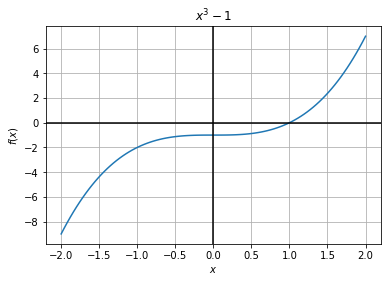

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^3-1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


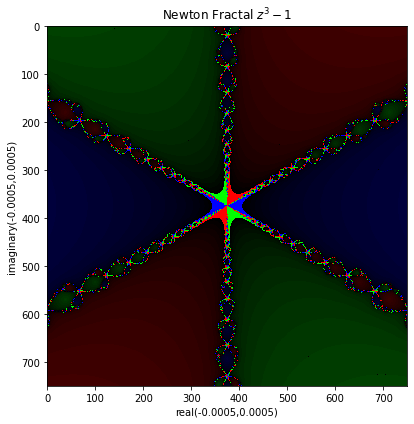

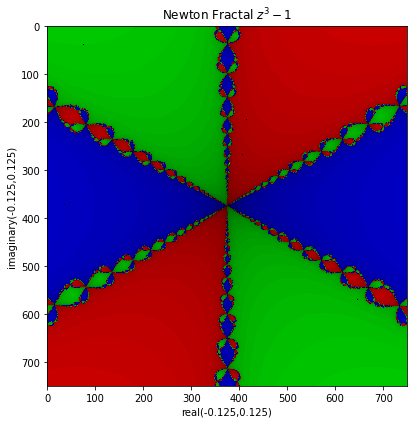

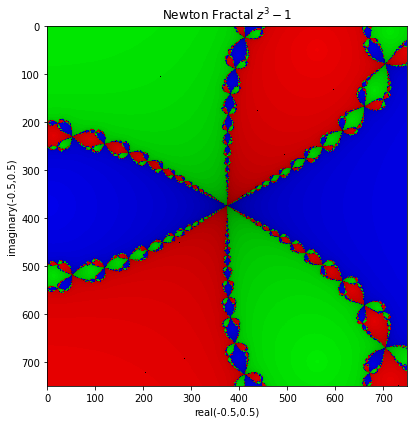

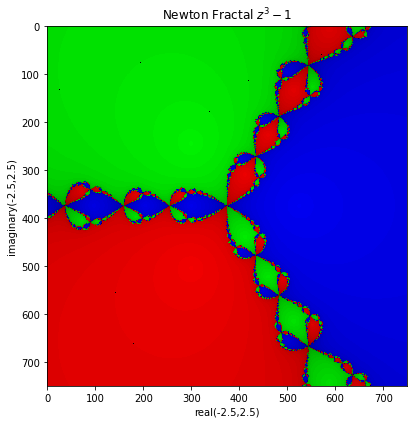

In [ ]:
roots = list(np.polynomial.Polynomial([-1,0,0,1]).roots())

display(roots,fstr,zoom=1/1000)
display(roots,fstr,zoom=1/4)
display(roots,fstr,zoom=1)
display(roots,fstr,zoom=5)

* ## Iteraciones y convergencia.

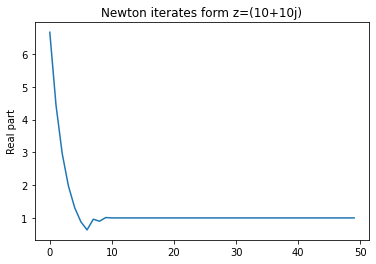

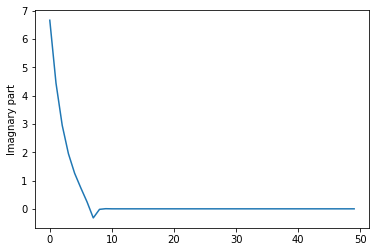

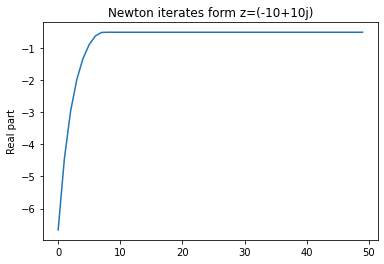

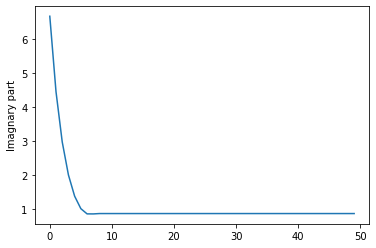

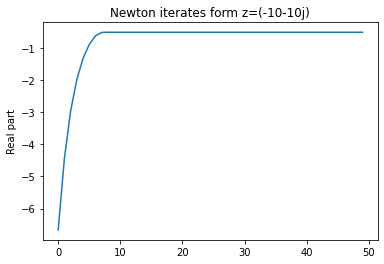

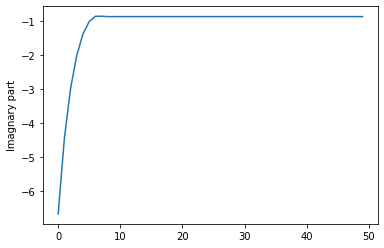

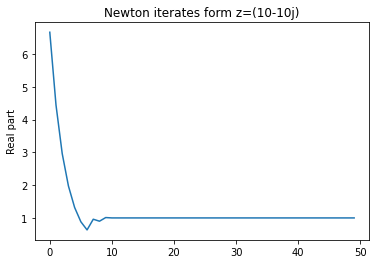

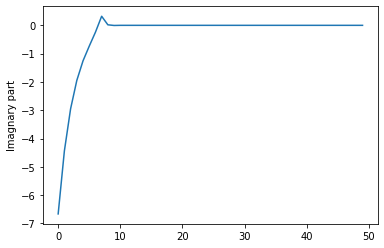

ZeroDivisionError        Traceback (most recent call last)
<ipython-input-39-cd544359031e> in <module>()
     12     for k in range(50):
     13         dz = df(zi)
---> 14         zi = zi - f(zi) / dz # Newton iteration
     15         r.append(np.real(zi))
     16         i.append(np.imag(zi))
ZeroDivisionError: complex division by zero


In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(4):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

print("ZeroDivisionError        Traceback (most recent call last)\n<ipython-input-39-cd544359031e> in <module>()\n     12     for k in range(50):\n     13         dz = df(zi)\n---> 14         zi = zi - f(zi) / dz # Newton iteration\n     15         r.append(np.real(zi))\n     16         i.append(np.imag(zi))\nZeroDivisionError: complex division by zero")

## $f(z)= z^3-2z+2\; | \; f(x)= x^3-2x+2$

In [ ]:
def f(z):
    return z**3-2*z+2

def df(z):
    return 3*z**2-2

fstr = '$z^3-2z+2$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

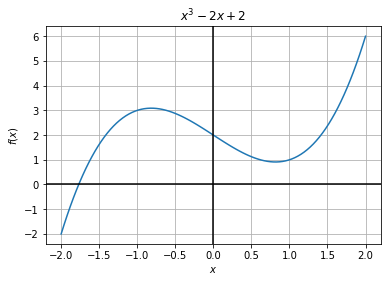

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^3-2x+2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


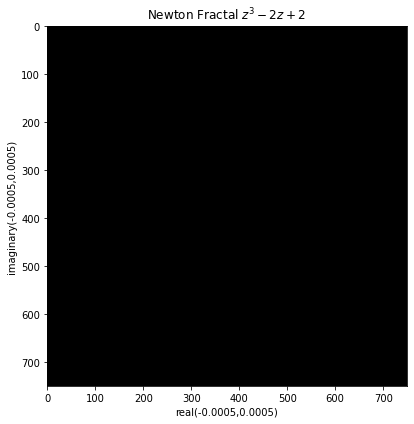

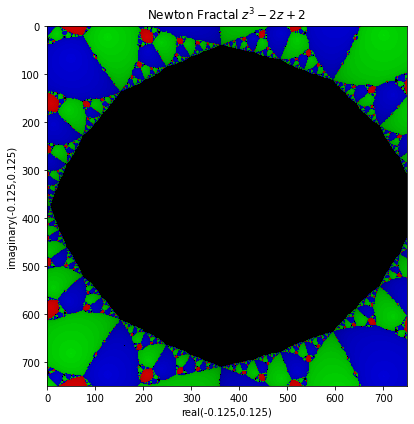

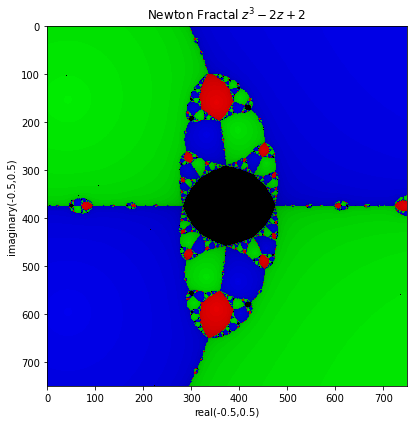

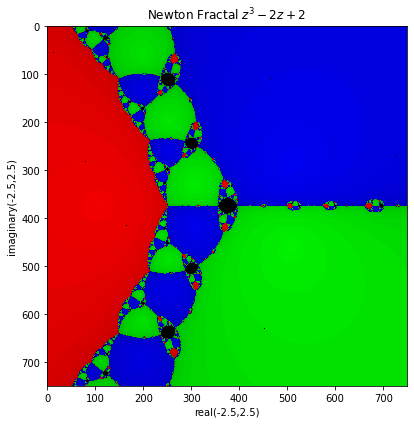

In [ ]:
roots = list(np.polynomial.Polynomial([2,-2,0,1]).roots())

display(roots,fstr,zoom=1/1000)
display(roots,fstr,zoom=1/4)
display(roots,fstr,zoom=1)
display(roots,fstr,zoom=5)

* ## Iteraciones y convergencia.

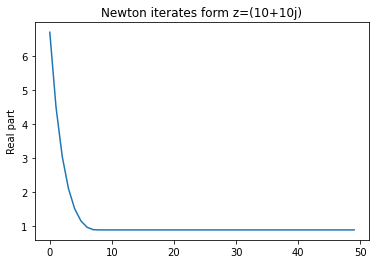

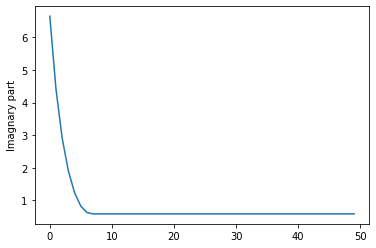

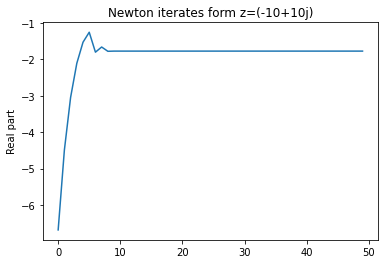

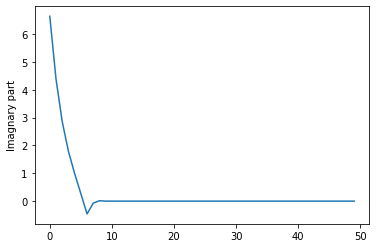

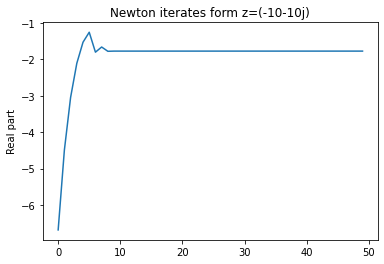

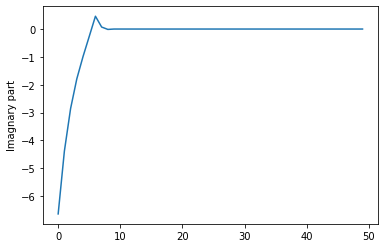

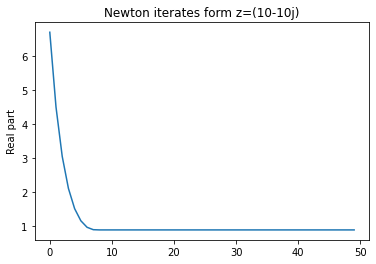

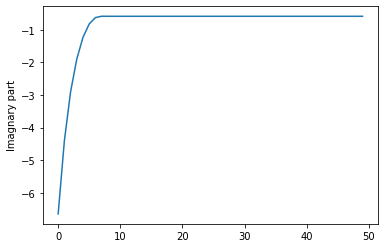

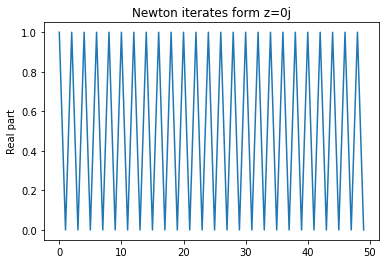

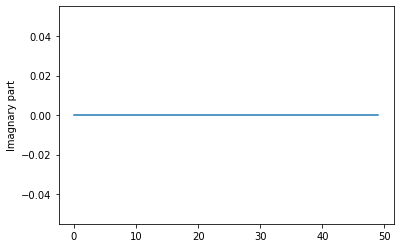

In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(5):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show();

## $f(z)= z^8+15z^4-16\; | \; f(x)= x^8+15x^4-16$

In [ ]:
def f(z):
    return z**8+15*z**4-16

def df(z):
    return 8*z**7+60*z**3

fstr = '$z^8+15z^4-16$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

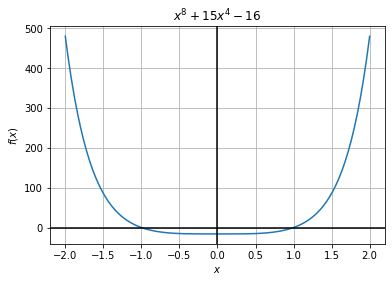

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^8+15x^4-16$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


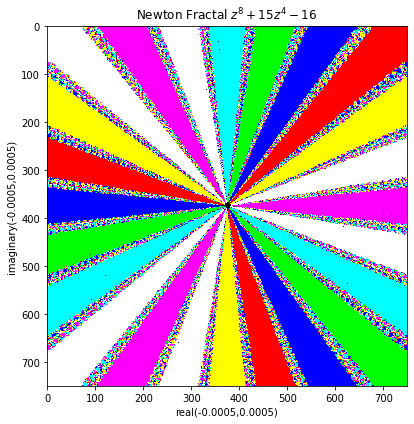

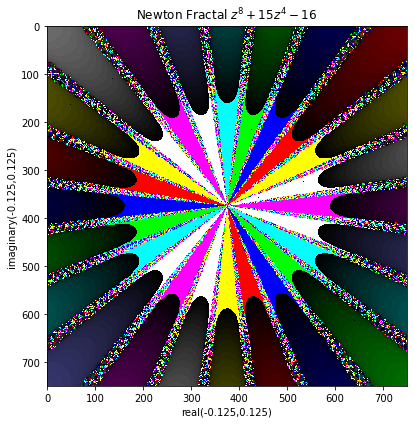

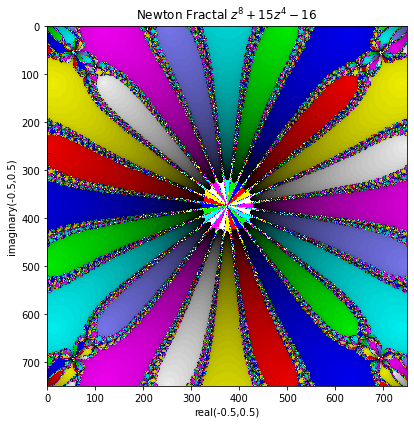

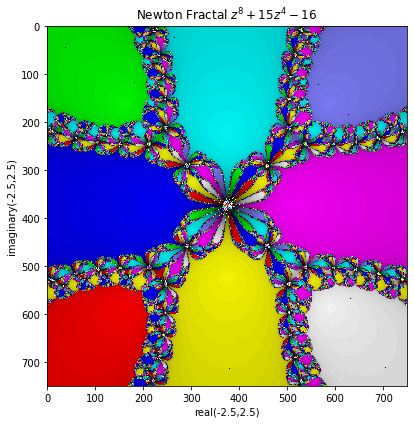

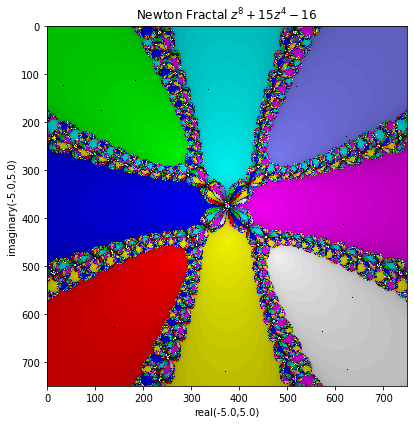

In [ ]:
roots = list(np.polynomial.Polynomial([-16,0,0,0,15,0,0,0,1]).roots())

display(roots,fstr,zoom=1/1000)
display(roots,fstr,zoom=1/4)
display(roots,fstr,zoom=1)
display(roots,fstr,zoom=5)
display(roots,fstr,zoom=10)

* ## Iteraciones y convergencia.

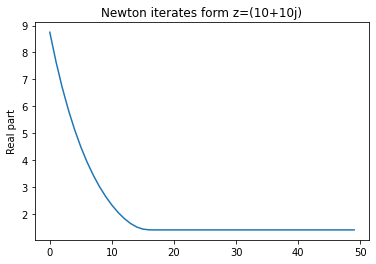

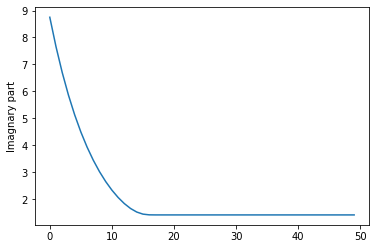

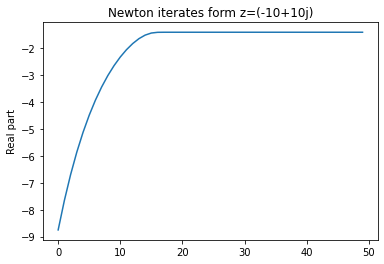

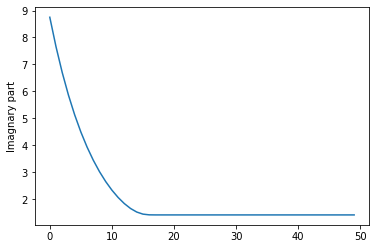

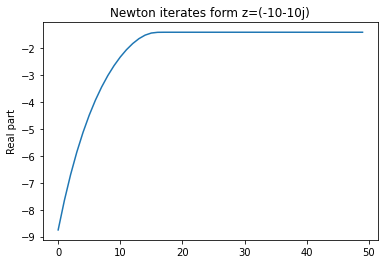

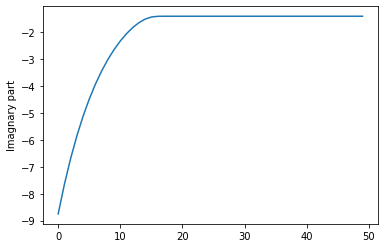

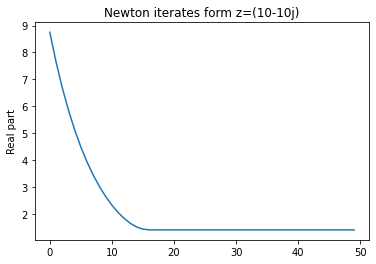

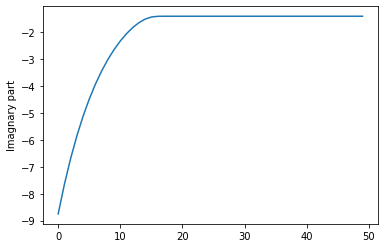

ZeroDivisionError        Traceback (most recent call last)
<ipython-input-39-cd544359031e> in <module>()
     12     for k in range(50):
     13         dz = df(zi)
---> 14         zi = zi - f(zi) / dz # Newton iteration
     15         r.append(np.real(zi))
     16         i.append(np.imag(zi))
ZeroDivisionError: complex division by zero


In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(4):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

print("ZeroDivisionError        Traceback (most recent call last)\n<ipython-input-39-cd544359031e> in <module>()\n     12     for k in range(50):\n     13         dz = df(zi)\n---> 14         zi = zi - f(zi) / dz # Newton iteration\n     15         r.append(np.real(zi))\n     16         i.append(np.imag(zi))\nZeroDivisionError: complex division by zero")

## $f(z)= z^5-3iz^3-(5 + 2i)z^2+3z+1\; | \; f(x)= x^5-3ix^3-(5 + 2i)x^2+3x+1$

In [ ]:
def f(z):
    return z**5-3*complex(0,1)*z**3-(5+2*complex(0,1))*z**2+3*z+1

def df(z):
    return 3-(10 + 4*complex(0,1))*z-9*complex(0,1)*z**2+5*z**4

fstr = '$z^5-3iz^3-(5 + 2i)z^2+3z+1$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


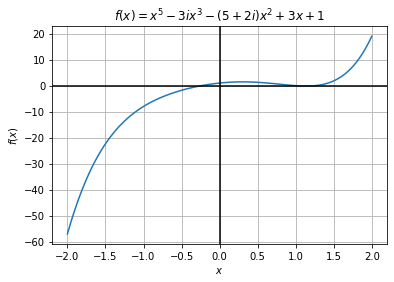

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$f(x)= x^5-3ix^3-(5 + 2i)x^2+3x+1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

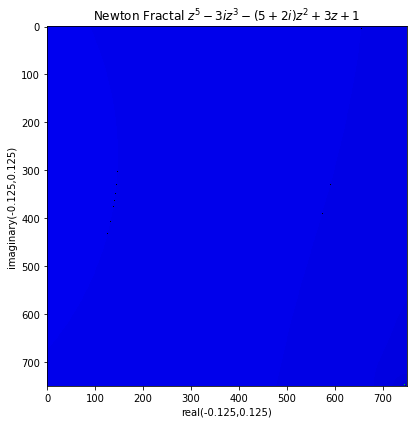

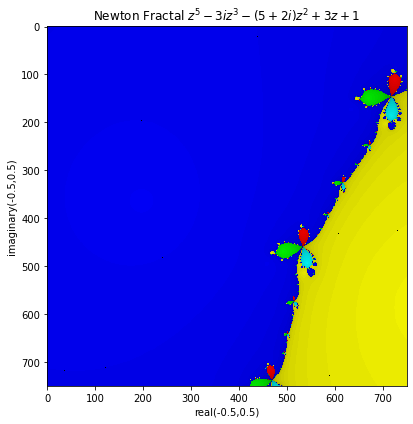

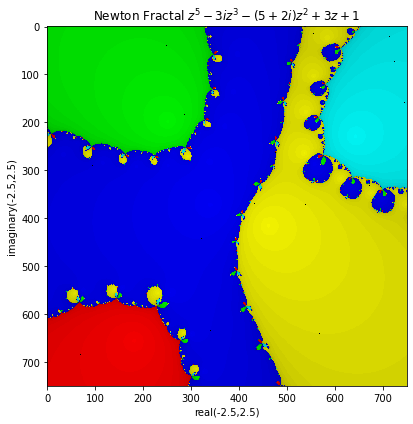

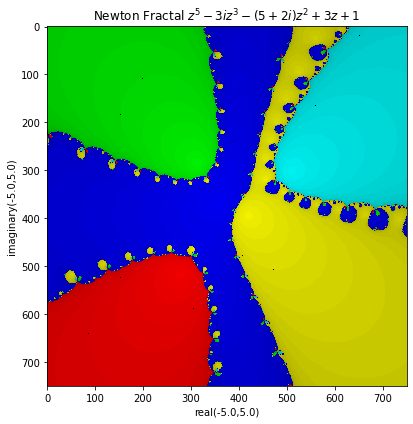

In [ ]:
roots = list(np.polynomial.Polynomial([1,3,-(5+2*complex(0,1)),-3*complex(0,1),0,1]).roots())

display(roots,fstr,zoom=1/4)
display(roots,fstr,zoom=1)
display(roots,fstr,zoom=5)
display(roots,fstr,zoom=10)

* ## Iteraciones y convergencia.

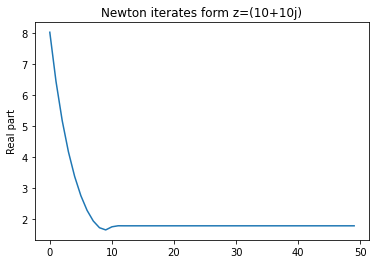

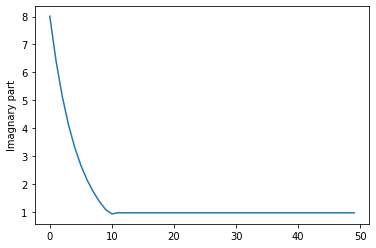

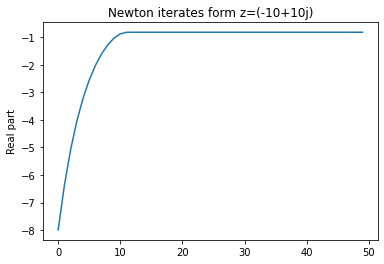

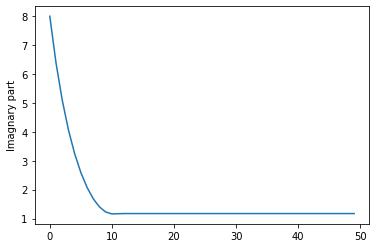

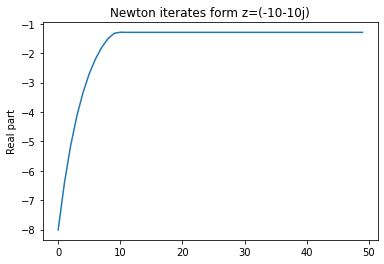

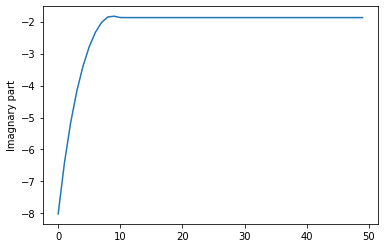

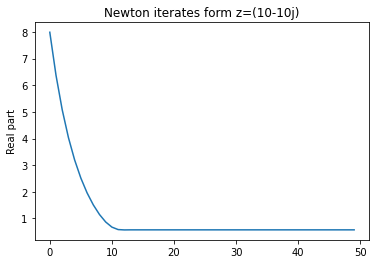

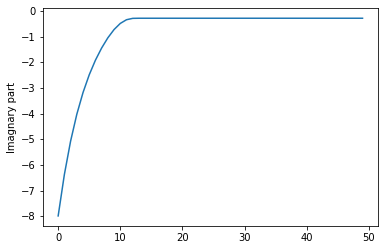

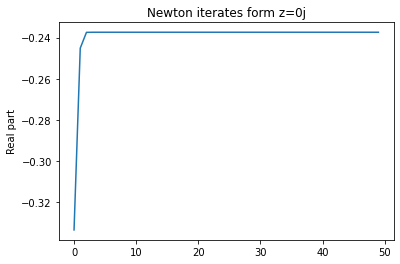

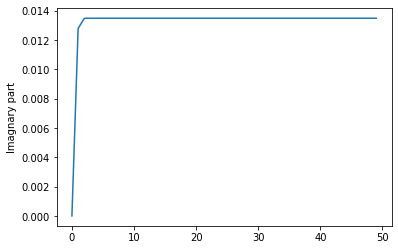

In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(5):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show();

## $f(z)= \sin z\; | \; f(x)= \sin x$

In [ ]:
def f(z):
    return np.sin(z)

def df(z):
    return np.cos(z)

fstr = '$\sin z$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

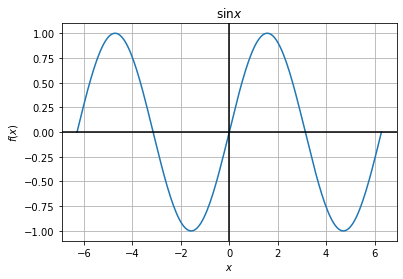

In [ ]:
x = np.linspace(-2*math.pi,2*math.pi,200)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


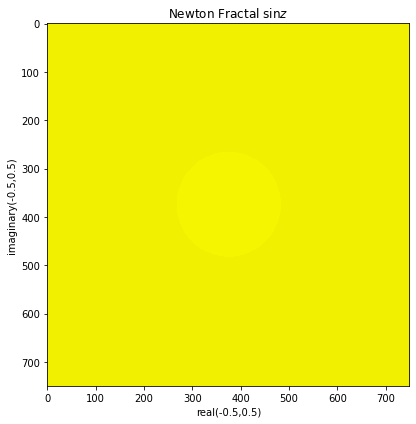

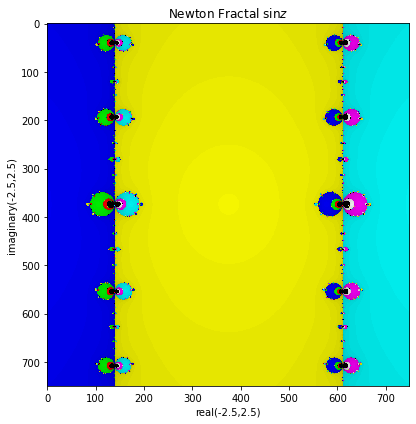

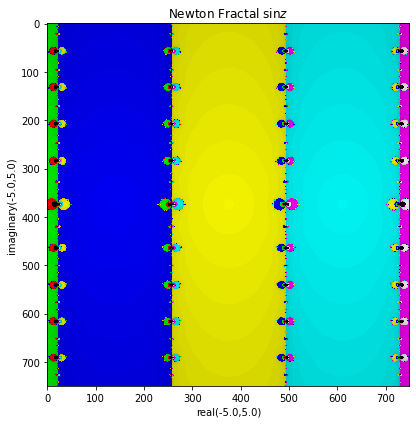

In [ ]:
roots = [math.pi*i for i in range(-3,4)]

display(roots,fstr,zoom=1)
display(roots,fstr,zoom=5)
display(roots,fstr,zoom=10)

* ## Iteraciones y convergencia.

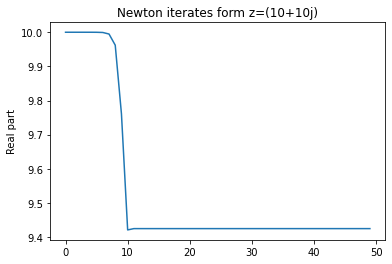

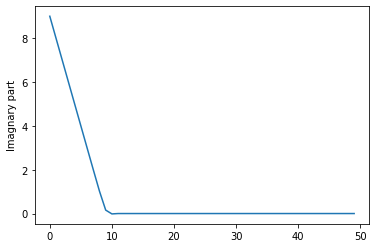

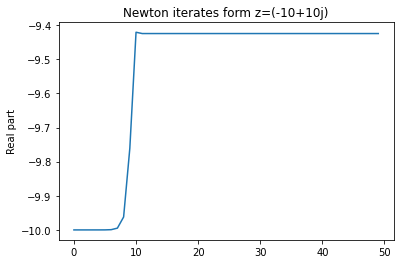

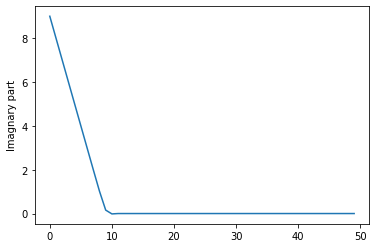

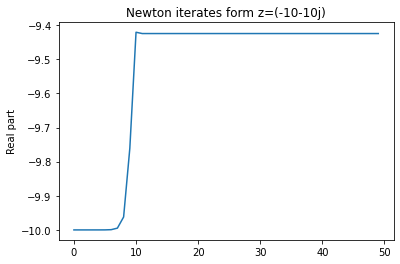

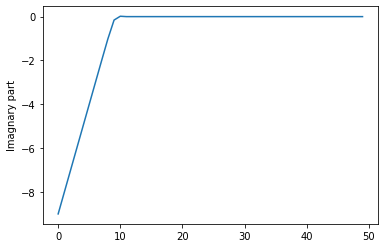

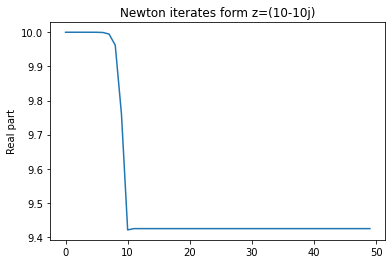

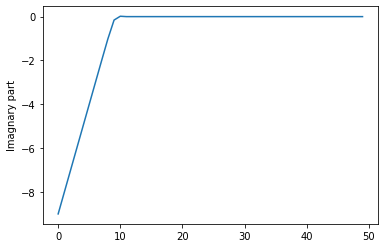

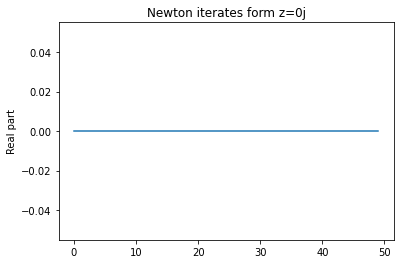

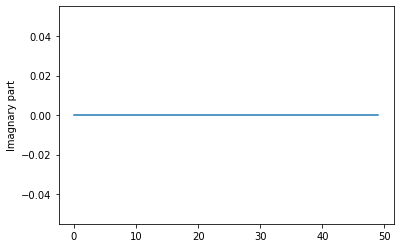

In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(5):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()


## $f(z)= z^2-1\; | \; f(x)= x^2-1$

In [ ]:
def f(z):
    return z**2-1

def df(z):
    return 2*z

fstr = '$z^2-1$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

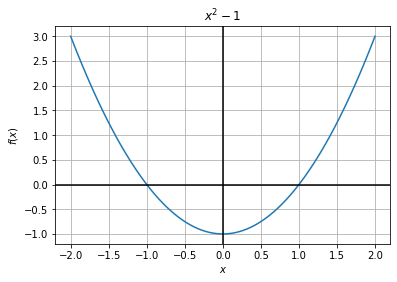

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^2-1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

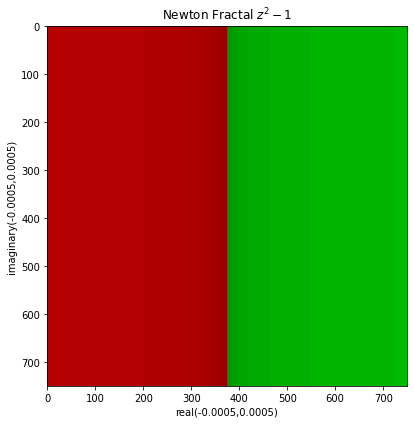

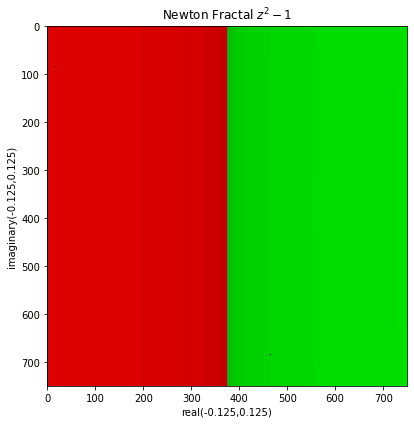

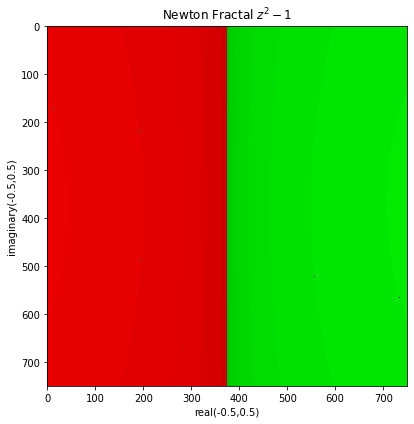

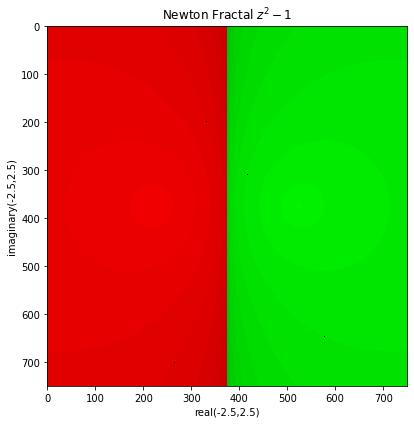

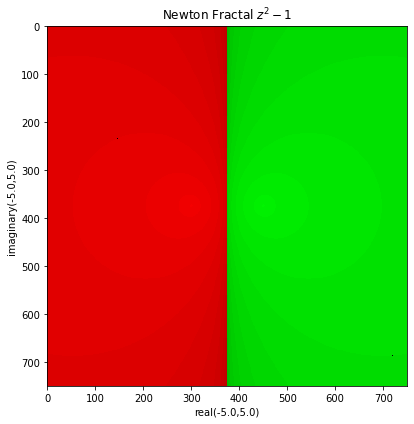

In [ ]:
roots = list(np.polynomial.Polynomial([-1,0,1]).roots())

display(roots,fstr,zoom=1/1000)
display(roots,fstr,zoom=1/4)
display(roots,fstr,zoom=1)
display(roots,fstr,zoom=5)
display(roots,fstr,zoom=10)

* ## Iteraciones y convergencia.

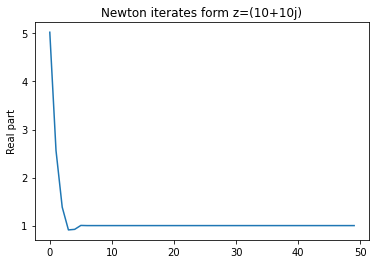

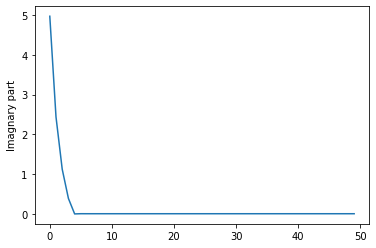

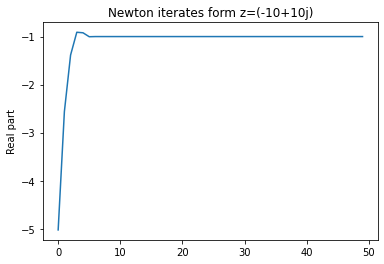

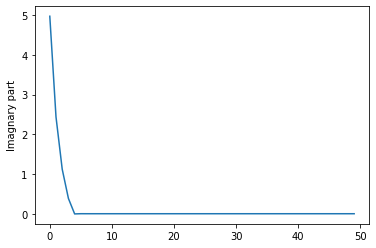

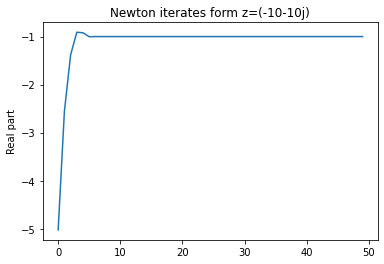

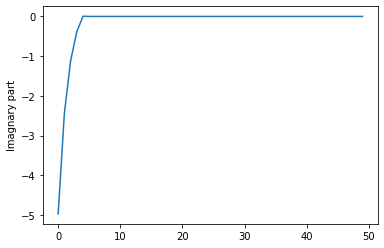

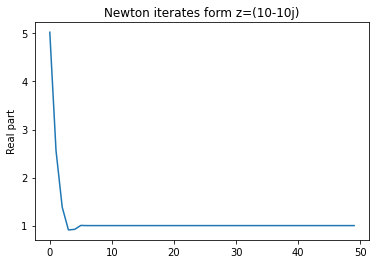

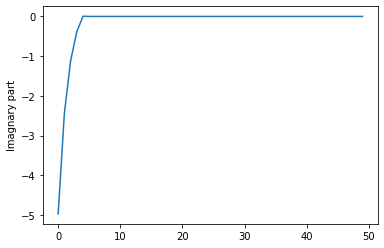

ZeroDivisionError        Traceback (most recent call last)
<ipython-input-39-cd544359031e> in <module>()
     12     for k in range(50):
     13         dz = df(zi)
---> 14         zi = zi - f(zi) / dz # Newton iteration
     15         r.append(np.real(zi))
     16         i.append(np.imag(zi))
ZeroDivisionError: complex division by zero


In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(4):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

print("ZeroDivisionError        Traceback (most recent call last)\n<ipython-input-39-cd544359031e> in <module>()\n     12     for k in range(50):\n     13         dz = df(zi)\n---> 14         zi = zi - f(zi) / dz # Newton iteration\n     15         r.append(np.real(zi))\n     16         i.append(np.imag(zi))\nZeroDivisionError: complex division by zero")

## $f(z)= \sin z-1\; | \; f(x)= \sin x-1$

In [ ]:
def f(z):
    return np.sin(z)-1

def df(z):
    return np.cos(z)

fstr = '$\sin z-1$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

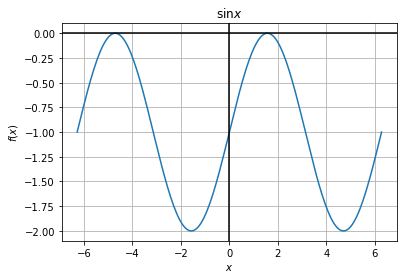

In [ ]:
x = np.linspace(-2*math.pi,2*math.pi,200)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


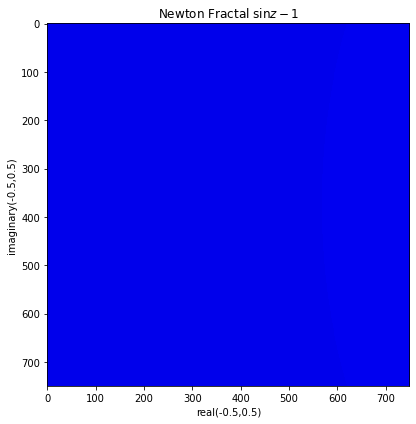

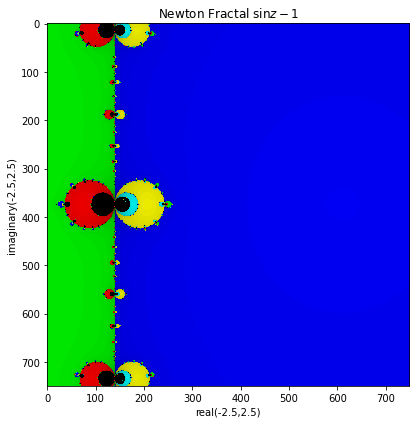

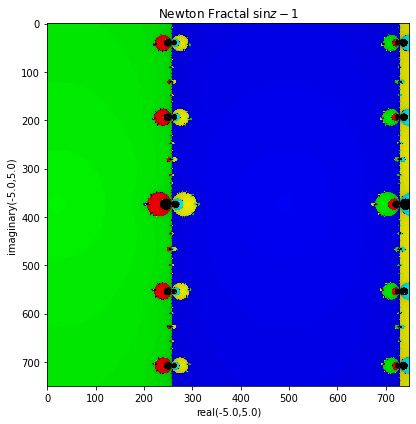

In [ ]:
roots = [(math.pi/2 + 2*i*math.pi) for i in range(-2,3)]

display(roots,fstr,zoom=1,m=2)
display(roots,fstr,zoom=5,m=2)
display(roots,fstr,zoom=10,m=2)

* ## Iteraciones y convergencia.

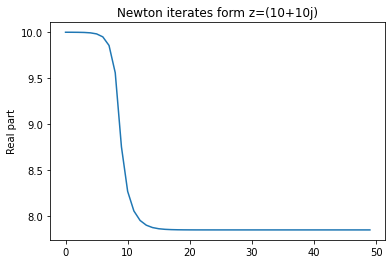

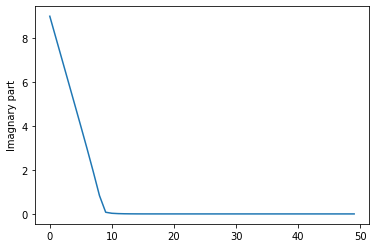

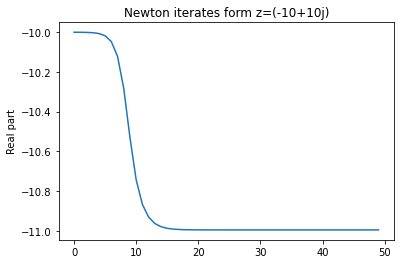

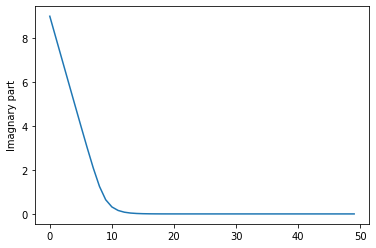

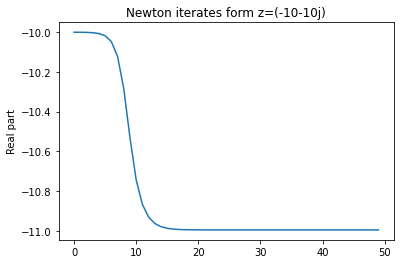

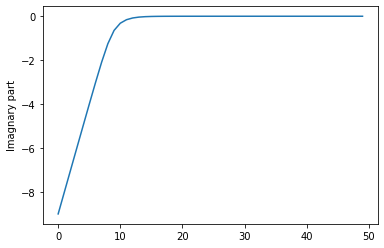

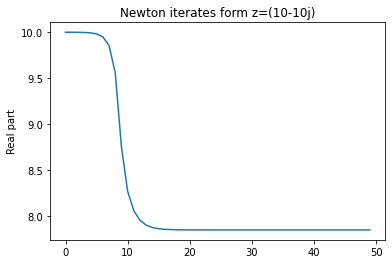

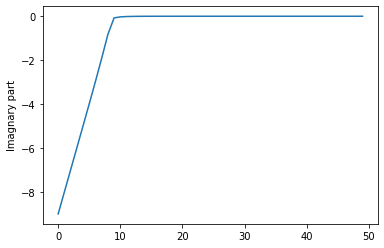

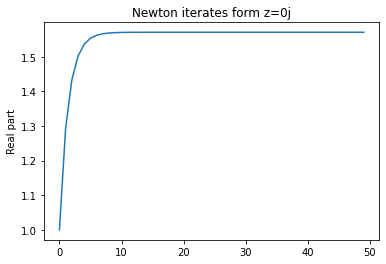

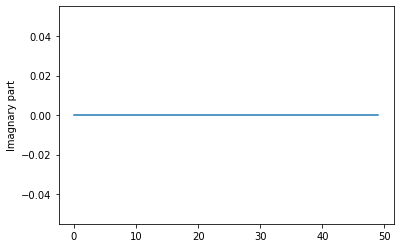

In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(5):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

## $f(z)= z^6+z^3-1\; | \; f(x)= x^6+x^3-1$

In [ ]:
def f(z):
    return z**6+z**3-1

def df(z):
    return 6*z**5+3*z**2

fstr = '$z^6+z^3-1$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

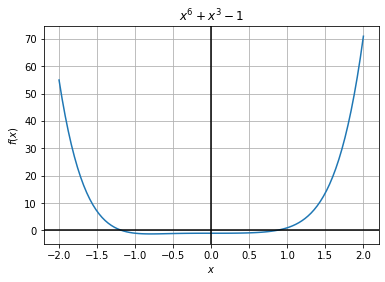

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^6+x^3-1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


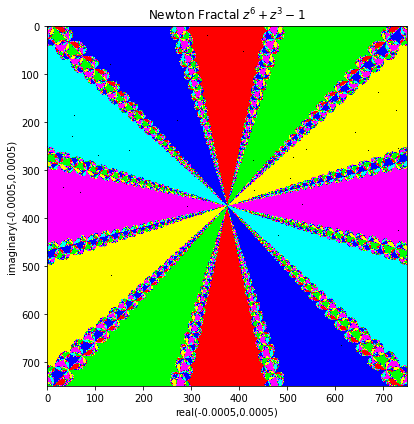

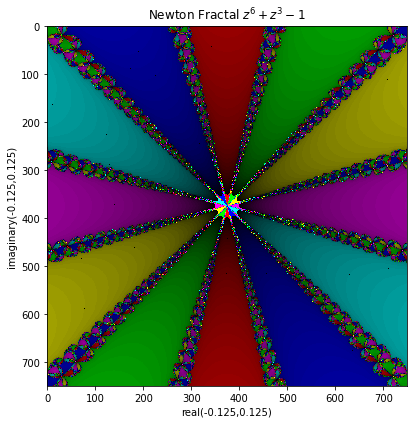

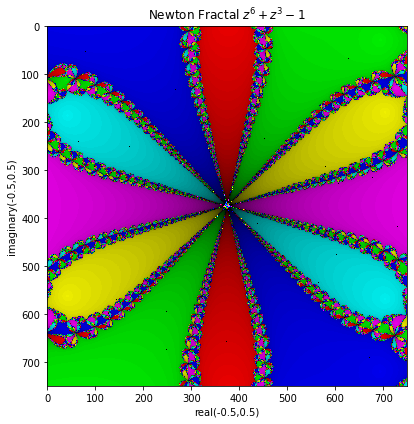

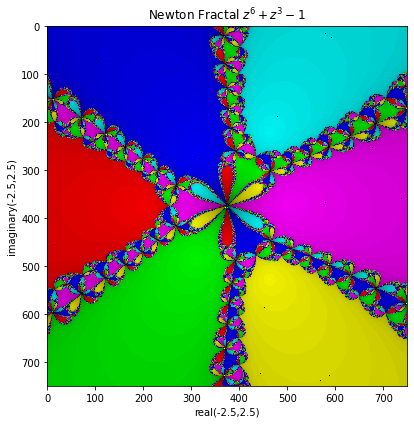

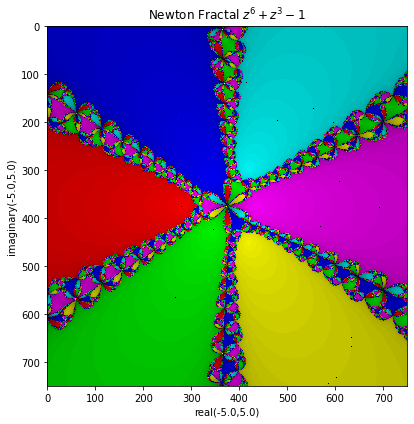

In [ ]:
roots = list(np.polynomial.Polynomial([-1,0,0,1,0,0,1]).roots())

display(roots,fstr,zoom=1/1000)
display(roots,fstr,zoom=1/4)
display(roots,fstr,zoom=1)
display(roots,fstr,zoom=5)
display(roots,fstr,zoom=10)

* ## Iteraciones y convergencia.

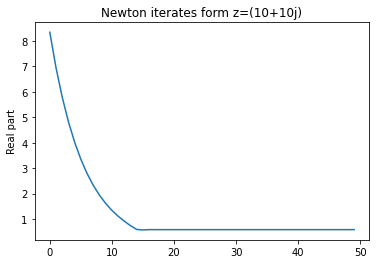

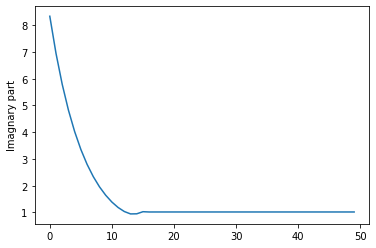

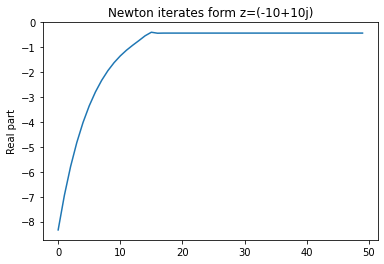

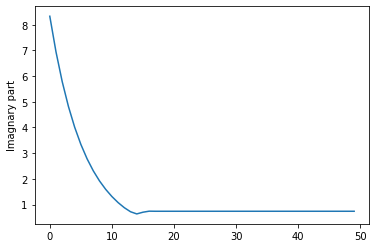

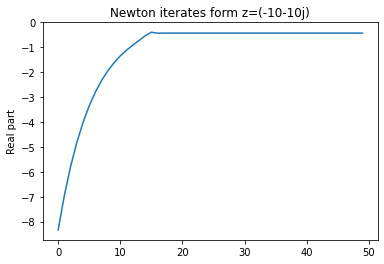

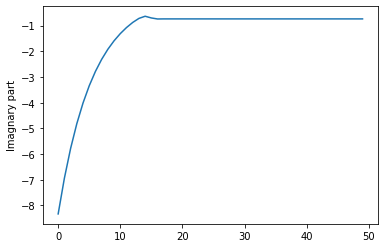

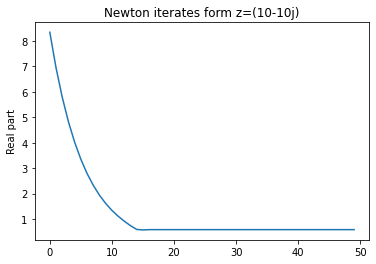

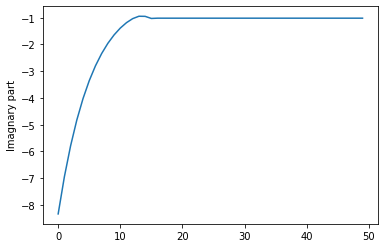

ZeroDivisionError        Traceback (most recent call last)
<ipython-input-39-cd544359031e> in <module>()
     12     for k in range(50):
     13         dz = df(zi)
---> 14         zi = zi - f(zi) / dz # Newton iteration
     15         r.append(np.real(zi))
     16         i.append(np.imag(zi))
ZeroDivisionError: complex division by zero


In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(4):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

print("ZeroDivisionError        Traceback (most recent call last)\n<ipython-input-39-cd544359031e> in <module>()\n     12     for k in range(50):\n     13         dz = df(zi)\n---> 14         zi = zi - f(zi) / dz # Newton iteration\n     15         r.append(np.real(zi))\n     16         i.append(np.imag(zi))\nZeroDivisionError: complex division by zero")

## $f(z)= \cosh z - 1\; | \; f(x)= \cosh x - 1$

In [ ]:
def f(z):
    return np.cosh(z)-1

def df(z):
    return np.sinh(z)

fstr = '$\cosh z-1$'

* ## Gráfica en los reales

Grafiquemos la función $f(x)$ en los reales.

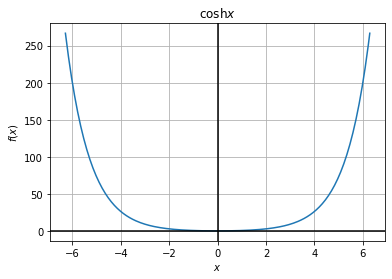

In [ ]:
x = np.linspace(-2*math.pi,2*math.pi,200)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$\cosh x$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

* ## Fractales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


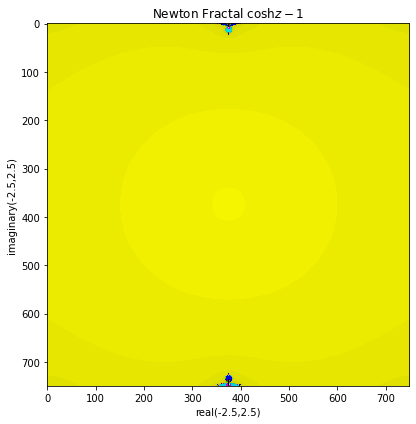

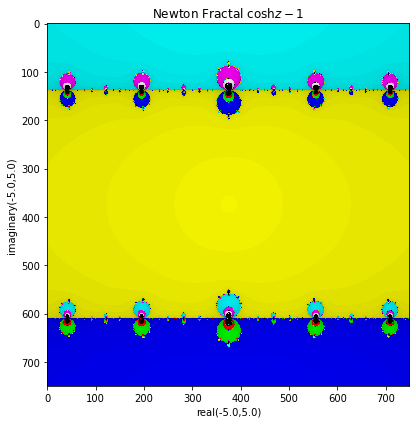

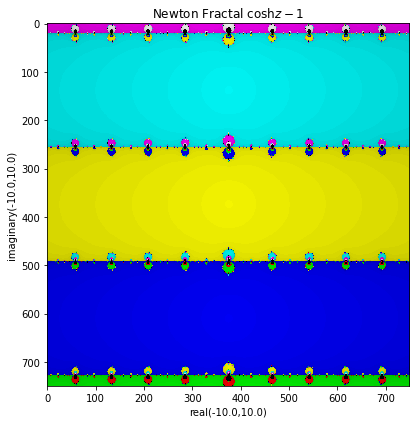

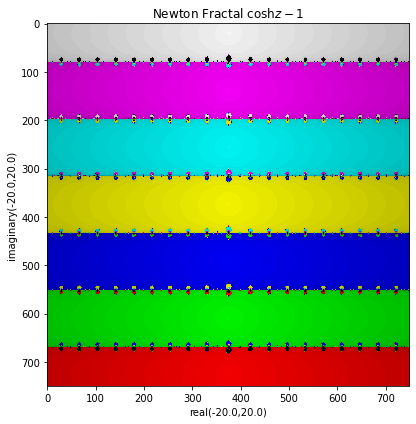

In [ ]:
roots = [ 2*i*math.pi*complex(0,1) for i in range(-3,4)]

display(roots,fstr,zoom=5,m=2)
display(roots,fstr,zoom=10,m=2)
display(roots,fstr,zoom=20,m=2)
display(roots,fstr,zoom=40,m=2)

* ## Iteraciones y convergencia.

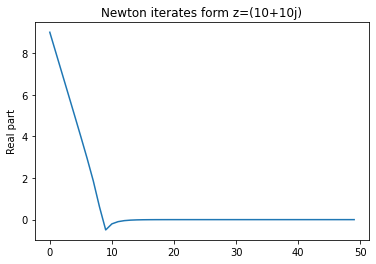

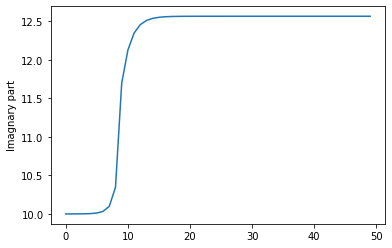

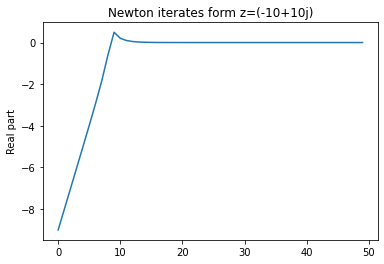

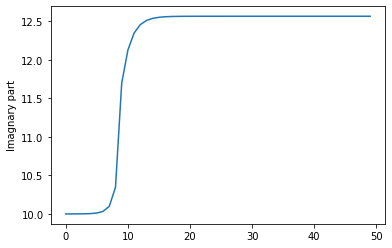

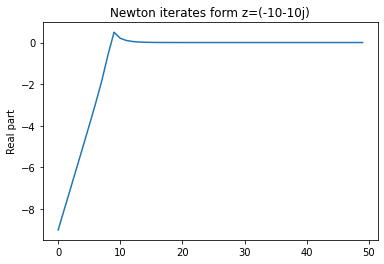

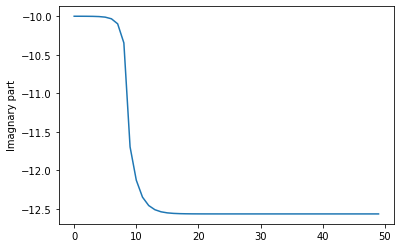

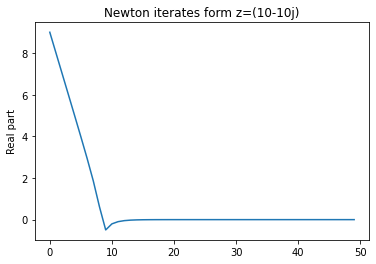

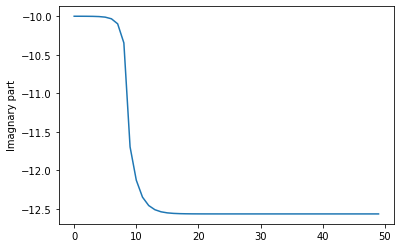

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in cdouble_scalars
  


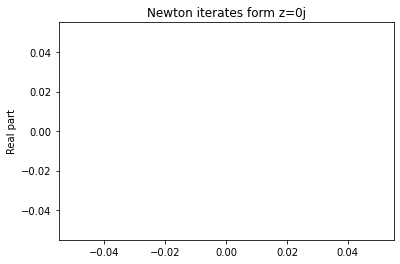

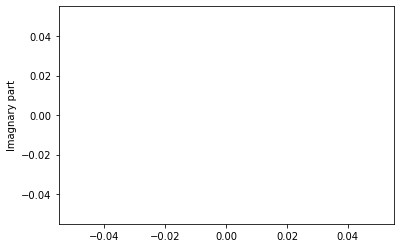

In [ ]:
z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(5):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()